<a href="https://colab.research.google.com/github/THE-Amrit-mahto-05/Aluma/blob/main/Zipf's_Law_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
file_path = "/content/Maroon5.csv"
df = pd.read_csv(file_path)
df

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Maroon 5,Girls Like You (Remix),Red Pill Blues,2018.0,2018-05-30,adam levine spent 4 hours i need more hours wi...
1,1,Maroon 5,What Lovers Do,Red Pill Blues,2017.0,2017-08-30,adam levine say say say hey hey now baby oh ma...
2,2,Maroon 5,Memories,M57*,2019.0,2019-09-20,here's to the ones that we got cheers to the w...
3,3,Maroon 5,Girls Like You,Red Pill Blues,2017.0,2017-11-03,spent 4 hours i need more hours with you you s...
4,4,Maroon 5,Don’t Wanna Know,Red Pill Blues,2016.0,2016-10-12,oh hey oh oh hey oh oh oh hey uh oh uh oh ad...
...,...,...,...,...,...,...,...
192,192,Maroon 5,Animals (Sammy Bananas Remix),NaN,2014.0,2014-11-17,baby i'm preying on you tonight hunt you down ...
193,193,Maroon 5,Cold (Sak Noel Remix),NOW That’s What I Call A Workout 2018,2017.0,2017-12-15,adam levine cold enough to chill my bones it f...
194,194,Maroon 5,Hands Up,NaN,NaN,NaN,i'm the one you're gonna take from the followi...
195,195,Maroon 5,Cold (VAR!N Remix),NaN,2018.0,2018-11-03,cold enough to chill my bones it feels like i ...


In [ ]:
print("Shape:", df.shape)
print()
print("Column info:")
df.info()
print()
print("Summary:")
display(df.describe())

Shape: (197, 7)

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  197 non-null    int64  
 1   Artist      197 non-null    object 
 2   Title       197 non-null    object 
 3   Album       153 non-null    object 
 4   Year        127 non-null    float64
 5   Date        127 non-null    object 
 6   Lyric       197 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 10.9+ KB

Summary:


,Unnamed: 0,Year
count,197.000000,127.000000
mean,98.000000,2011.795276
std,57.013156,5.283004
min,0.000000,2002.000000
25%,49.000000,2007.000000
50%,98.000000,2012.000000
75%,147.000000,2017.000000
max,196.000000,2020.000000


In [ ]:
print("Missing values per column:")
print(df.isna().sum())
print()
for col in ['Album', 'Year']:
    if col in df.columns:
        print(f"Unique {col}: {df[col].nunique()}")
        print(df[col].value_counts().head(5))
    print()

Missing values per column:
Unnamed: 0     0
Artist         0
Title          0
Album         44
Year          70
Date          70
Lyric          0
dtype: int64

Unique Album: 23
Album
It Won’t Be Soon Before Long                  20
Hands All Over                                19
Call and Response: The Remix Album            18
Songs About Jane: 10th Anniversary Edition    16
Overexposed                                   15
Name: count, dtype: int64

Unique Year: 18
Year
2017.0    20
2007.0    18
2014.0    14
2012.0    13
2002.0    13
Name: count, dtype: int64



Step 1: Combine all lyrics into one text blob

In [ ]:
# Step 1: Combine all lyrics into one text blob
all_lyrics = " ".join(df['Lyric'].dropna()).lower()
all_lyrics

"adam levine spent 4 hours i need more hours with you you spent the weekend getting even ooh we spent the late nights making things right between us but now it's all good babe roll that backwood babe and play me close   adam levine 'cause girls like you run 'round with guys like me 'til sundown when i come through i need a girl like you yeah yeah girls like you love fun and yeah me too what i want when i come through i need a girl like you yeah yeah  post adam levine yeah yeah yeah yeah yeah yeah i need a girl like you yeah yeah yeah yeah yeah yeah yeah yeah i need a girl like you   adam levine i spent last night on the last flight to you ay took a whole day up tryna get way up ooh we spent the daylight tryna make things right between us and now it's all good babe roll that backwood babe and play me close yeah   adam levine 'cause girls like you run 'round with guys like me 'til sundown when i come through i need a girl like you yeah yeah girls like you love fun and yeah me too what i 

Step 2: Clean and tokenize


In [ ]:
# Step 2: Clean and tokenize
all_lyrics = re.sub(r'[^a-z\s]', '', all_lyrics)  # only alphabetic words
all_lyrics
words = all_lyrics.split()

Step 3: Count word frequencies

In [ ]:
# Step 3: Count word frequencies
word_count = Counter(words)

Step 4: Rank the words by frequency


In [ ]:
# Step 4: Rank the words by frequency
sorted_counts = sorted(word_count.values(), reverse=True)
sorted_counts
ranks = range(1, len(sorted_counts) + 1)
frequencies = sorted_counts

Step 5: Plot frequency vs rank on a log-log scale

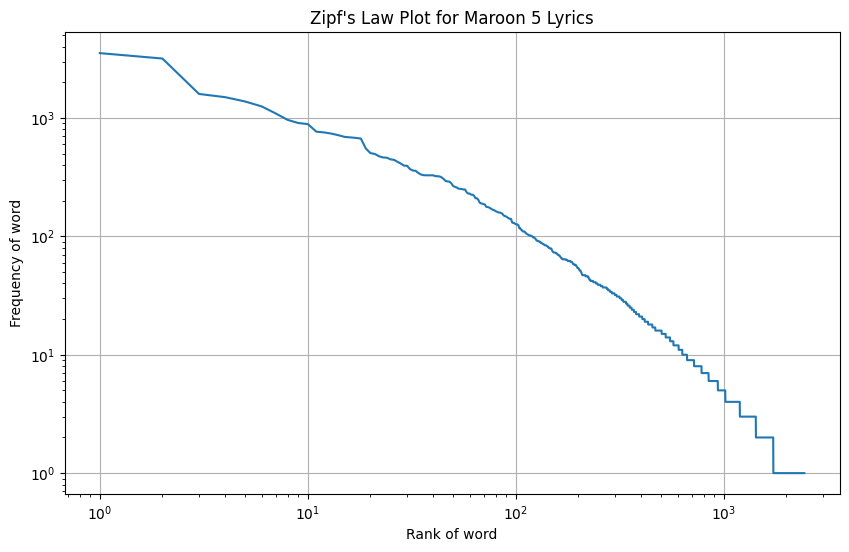

In [ ]:
# Step 5: Plot frequency vs rank on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies)
plt.title("Zipf's Law Plot for Maroon 5 Lyrics")
plt.xlabel("Rank of word")
plt.ylabel("Frequency of word")
plt.grid(True)
plt.show()

Unique words and Total words

In [ ]:
unique_words = len(word_count)
total_words = sum(word_count.values())
print(f"Total words: {total_words}")
print(f"Unique words: {unique_words}")
vocab_richness = unique_words / total_words
print(f"Vocabulary richness (diversity): {round(vocab_richness,3)}")

Total words: 66522
Unique words: 2439
Vocabulary richness (diversity): 0.037


Compute word count per song

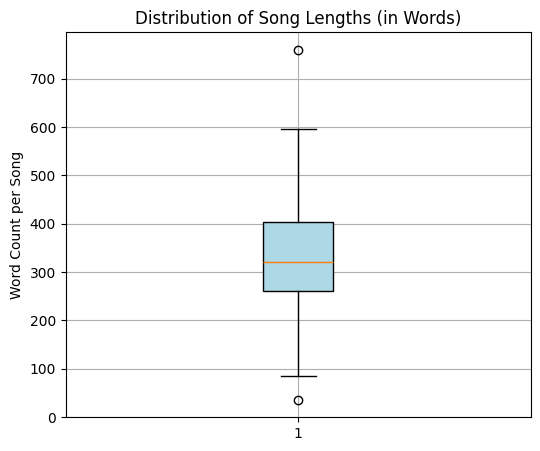

In [ ]:
# Compute word count per song
word_counts_per_song = []
for title, group in df.groupby('Title'):
    lyrics = group['Lyric'].iloc[0]
    word = lyrics.split()
    word_counts_per_song.append(len(word))

plt.figure(figsize=(6,5))
plt.boxplot(word_counts_per_song, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Distribution of Song Lengths (in Words)")
plt.ylabel("Word Count per Song")
plt.grid(True)
plt.show()

Distribution of Song Lengths (in Words)

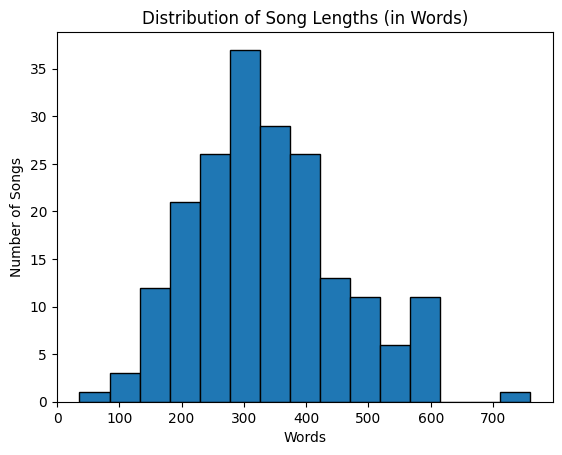

In [ ]:
word_counts = []
for title, group in df.groupby("Title"):
    text = group["Lyric"].iloc[0]
    word_counts.append(len(text.split()))
plt.hist(word_counts, bins=15, edgecolor="black")
plt.title("Distribution of Song Lengths (in Words)")
plt.xlabel("Words")
plt.ylabel("Number of Songs")
plt.show()

Top 20 most frequent words

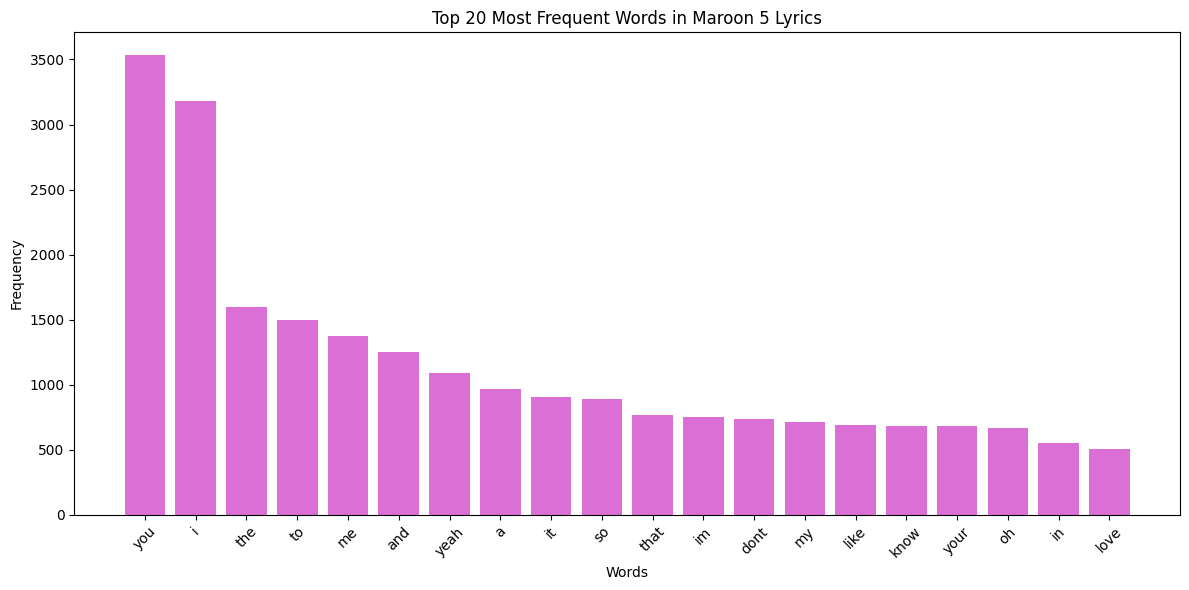

In [ ]:

top_words = word_count.most_common(20)
words_top, freqs_top = zip(*top_words)

plt.figure(figsize=(12, 6))
plt.bar(words_top, freqs_top, color='orchid')
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words in Maroon 5 Lyrics")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Sentiment Balance in Maroon 5 Lyrics

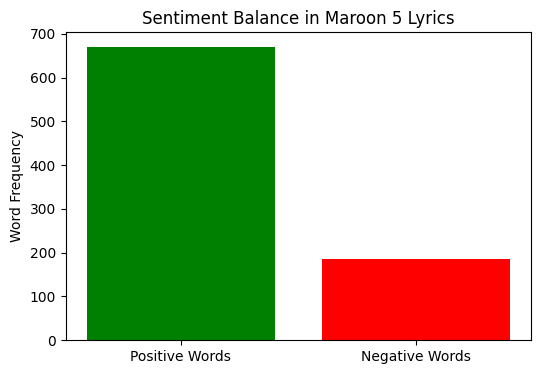

In [ ]:
positive_words = {"love", "happy", "beautiful", "good", "joy", "smile"}
negative_words = {"sad", "pain", "cry", "tears", "lonely", "hurt"}
positive_count = sum(word_count[word] for word in positive_words if word in word_count)
negative_count = sum(word_count[word] for word in negative_words if word in word_count)
plt.figure(figsize=(6,4))
plt.bar(["Positive Words", "Negative Words"], [positive_count, negative_count], color=['green', 'red'])
plt.title("Sentiment Balance in Maroon 5 Lyrics")
plt.ylabel("Word Frequency")
plt.show()

Word length distribution

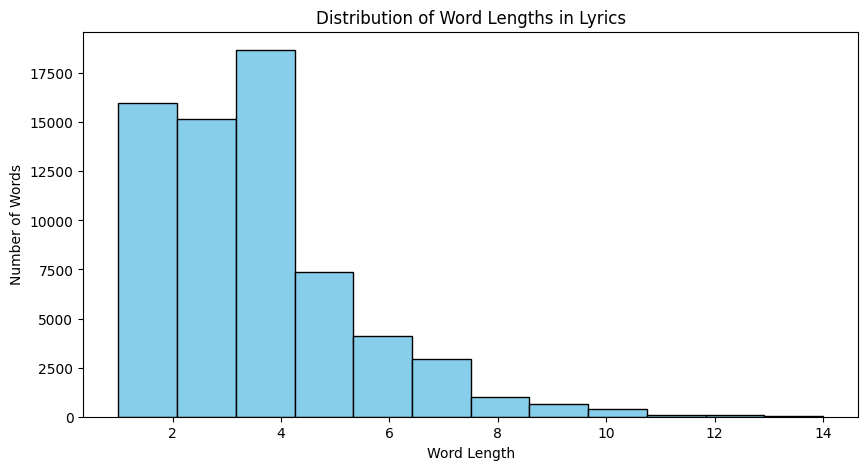

In [ ]:
word_lengths = [len(word) for word in words if len(word) < 15]
plt.figure(figsize=(10, 5))
plt.hist(word_lengths, bins=12, color='skyblue', edgecolor='black')
plt.title("Distribution of Word Lengths in Lyrics")
plt.xlabel("Word Length")
plt.ylabel("Number of Words")
plt.show()

Word Cloud

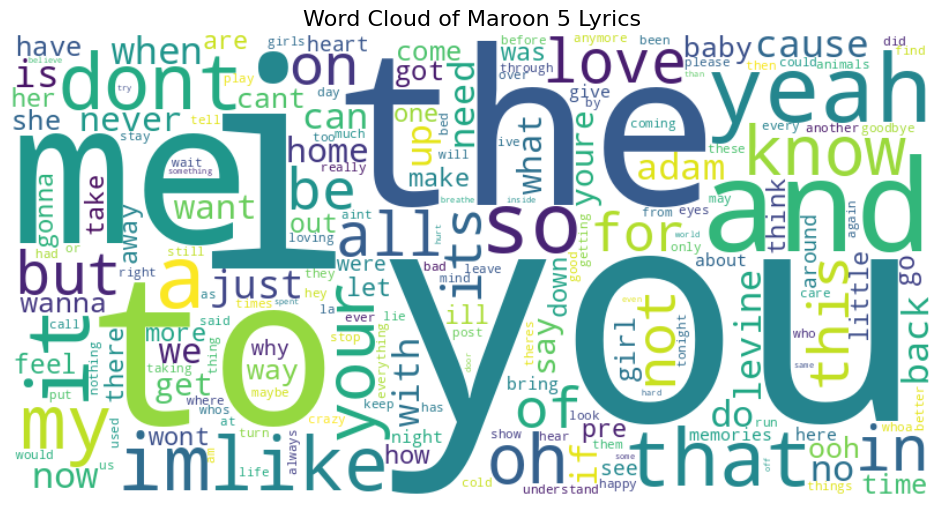

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Maroon 5 Lyrics", fontsize=16)
plt.show()

Emotional Words Distribution in Maroon 5 Lyrics

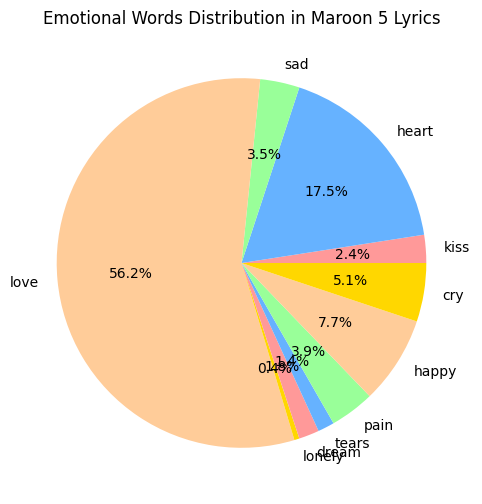

In [ ]:
emotional_words = {"love", "heart", "pain", "cry", "tears", "lonely", "dream", "happy", "sad", "kiss"}
emotion_counts = {word: word_count[word] for word in emotional_words if word in word_count}
plt.figure(figsize=(8, 6))
plt.pie(emotion_counts.values(), labels=emotion_counts.keys(), autopct='%1.1f%%', colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700'])
plt.title("Emotional Words Distribution in Maroon 5 Lyrics")
plt.show()

Most and Least Frequent Words and Average length of words

In [ ]:

most_common = word_count.most_common(10)
least_common = word_count.most_common()[-10:]

print("Top 10 most frequent words:")
for word, freq in most_common:
    print(f"{word}: {freq}")
print()

print("Least 10 frequent words:")
for word, freq in least_common:
    print(f"{word}: {freq}")
print()

avg_word_len = np.mean([len(word) for word in words])
print(f"Average word length: {round(avg_word_len,2)}")

Top 10 most frequent words:
you: 3532
i: 3179
the: 1596
to: 1500
me: 1378
and: 1253
yeah: 1094
a: 964
it: 907
so: 888

Least 10 frequent words:
shook: 1
pennin: 1
books: 1
thots: 1
berlin: 1
science: 1
spoken: 1
america: 1
children: 1
progress: 1

Average word length: 3.76


Word Changes Over the Years in Maroon 5 Lyrics

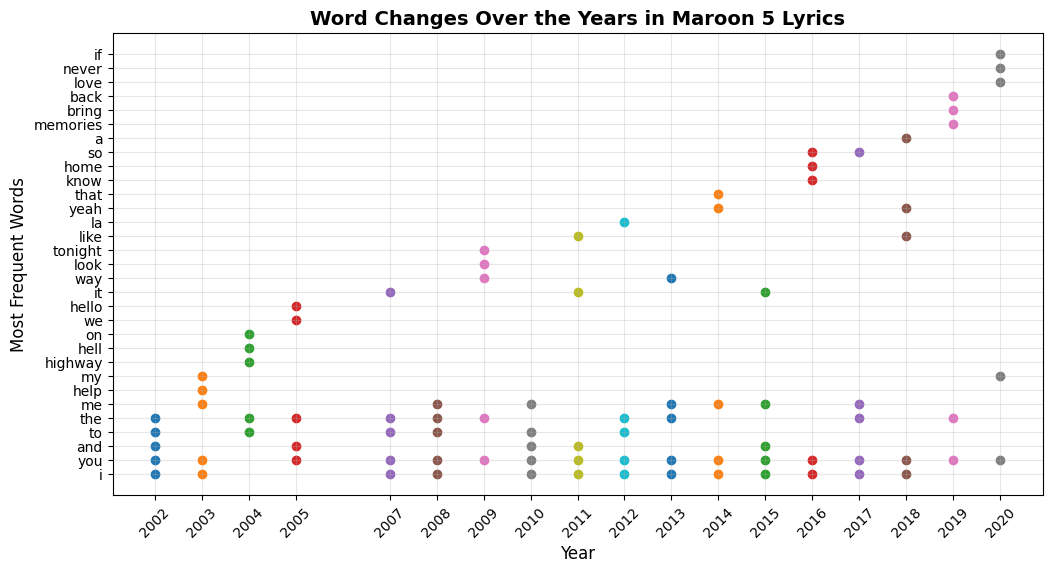

In [ ]:

years = sorted(df['Year'].dropna().astype(int).unique())
word_trends = {}
for year in years:
    lyrics = ' '.join(df[df['Year'] == year]['Lyric'])
    words = Counter(lyrics.split()).most_common(5)
    word_trends[year] = [word[0] for word in words]
plt.figure(figsize=(12, 6))
for year in years:
    plt.scatter([year] * len(word_trends[year]), word_trends[year], label=f"{year}")
plt.title("Word Changes Over the Years in Maroon 5 Lyrics", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Most Frequent Words", fontsize=12)
plt.xticks(years, rotation=45)
plt.grid(alpha=0.3)
plt.show()

Top 10 Songs: Total vs. Unique Words

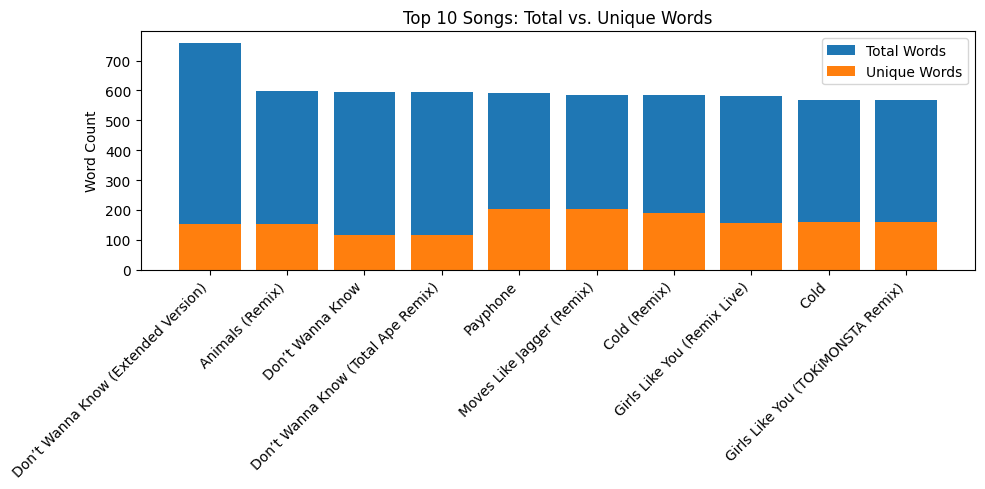

In [ ]:
song_texts = {}
for title, group in df.groupby('Title'):
    text = " ".join(group['Lyric'].dropna())
    words = text.split()
    song_texts[title] = {
        "total_words": len(words),
        "unique_words": len(set(words))
    }

song_stats = pd.DataFrame.from_dict(song_texts, orient='index')
top10 = song_stats.sort_values('total_words', ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(top10.index, top10['total_words'], label='Total Words')
plt.bar(top10.index, top10['unique_words'], label='Unique Words')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Word Count")
plt.title("Top 10 Songs: Total vs. Unique Words")
plt.legend()
plt.tight_layout()
plt.show()